<a href="https://colab.research.google.com/github/NidaNabi/embedding-new-datapoints-in-existing-t-SNE/blob/main/tsneonmnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#tsne on mnist
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path="/content/drive/My Drive/Colab Notebooks/train.csv"
df=pd.read_csv(path)


In [ ]:
print(df.head(4))


   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  

[4 rows

In [ ]:
l=df['label']
d = df.drop("label", axis = 1)

In [ ]:
from sklearn.preprocessing import StandardScaler
 
standardized_data = StandardScaler().fit_transform(d)
print(standardized_data.shape)

(42000, 784)


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


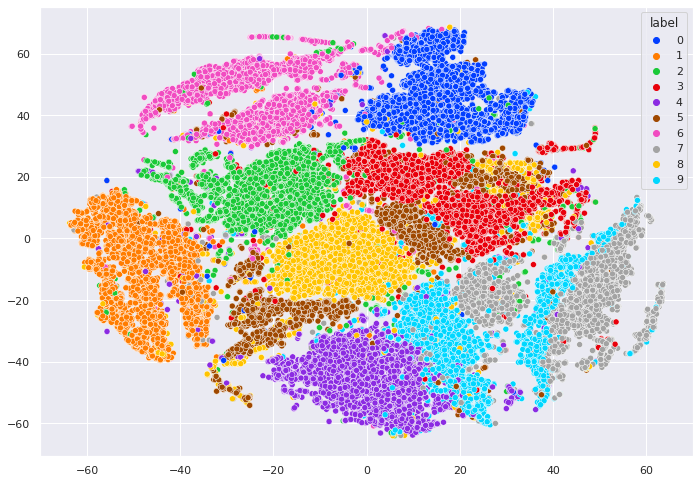

In [ ]:

from sklearn.manifold import TSNE
import seaborn as sn

model = TSNE(n_components = 2, random_state = 0)
tsne_data = model.fit_transform(standardized_data)
tsne_data = np.vstack((tsne_data.T, l)).T

sn.set(rc={'figure.figsize':(11.7,8.27)})
palette = sn.color_palette("bright", 10)
sn.scatterplot(tsne_data[:,0], tsne_data[:,1], hue=l, legend='full', palette=palette)

In [ ]:
#embedding new points
pip install opentsne

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.7 MB 4.9 MB/s 


In [ ]:
from openTSNE import TSNE
import seaborn as sns
from sklearn.model_selection import train_test_split
from openTSNE import TSNEEmbedding
from openTSNE import affinity
from openTSNE import initialization


In [ ]:
l=l.to_numpy()
d=d.to_numpy()


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(d,l,test_size=0.3)

In [ ]:
%%time
affinities_train = affinity.PerplexityBasedNN(
    x_train,
    perplexity=30,
    metric="euclidean",
    n_jobs=8,
    random_state=42,
    verbose=True,
)

===> Finding 90 nearest neighbors using Annoy approximate search using euclidean distance...
   --> Time elapsed: 89.41 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 2.32 seconds
CPU times: user 2min 18s, sys: 1.87 s, total: 2min 20s
Wall time: 1min 31s


In [ ]:
%time init_train = initialization.pca(x_train, random_state=42)

CPU times: user 3.08 s, sys: 2.32 s, total: 5.4 s
Wall time: 3.16 s


In [ ]:
embedding_train = TSNEEmbedding(
    init_train,
    affinities_train,
    negative_gradient_method="fft",
    n_jobs=8,
    verbose=True,
)

In [ ]:
%time embedding_train_1 = embedding_train.optimize(n_iter=250, exaggeration=12, momentum=0.5)

===> Running optimization with exaggeration=12.00, lr=2450.00 for 250 iterations...
Iteration   50, KL divergence 5.8920, 50 iterations in 5.1318 sec
Iteration  100, KL divergence 5.4490, 50 iterations in 6.1228 sec
Iteration  150, KL divergence 5.3633, 50 iterations in 3.4522 sec
Iteration  200, KL divergence 5.3312, 50 iterations in 3.4335 sec
Iteration  250, KL divergence 5.3155, 50 iterations in 3.4169 sec
   --> Time elapsed: 21.57 seconds
CPU times: user 27.5 s, sys: 297 ms, total: 27.8 s
Wall time: 21.7 s


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


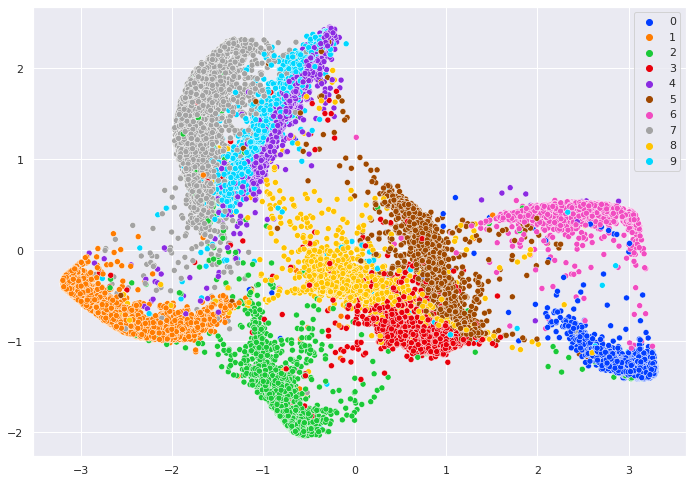

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
palette = sns.color_palette("bright", 10)
sns.scatterplot(embedding_train_1[:,0], embedding_train_1[:,1], hue=y_train, legend='full', palette=palette)


In [ ]:
%time embedding_train_2 = embedding_train_1.optimize(n_iter=500, momentum=0.8)

===> Running optimization with exaggeration=1.00, lr=2450.00 for 500 iterations...
Iteration   50, KL divergence 3.6412, 50 iterations in 3.4693 sec
Iteration  100, KL divergence 3.1684, 50 iterations in 3.4112 sec
Iteration  150, KL divergence 2.9342, 50 iterations in 4.2235 sec
Iteration  200, KL divergence 2.7860, 50 iterations in 5.1430 sec
Iteration  250, KL divergence 2.6823, 50 iterations in 5.9073 sec
Iteration  300, KL divergence 2.6068, 50 iterations in 7.3466 sec
Iteration  350, KL divergence 2.5502, 50 iterations in 10.3366 sec
Iteration  400, KL divergence 2.5073, 50 iterations in 9.9070 sec
Iteration  450, KL divergence 2.4741, 50 iterations in 11.6597 sec
Iteration  500, KL divergence 2.4476, 50 iterations in 13.6723 sec
   --> Time elapsed: 75.08 seconds
CPU times: user 1min 30s, sys: 2.04 s, total: 1min 32s
Wall time: 1min 15s


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


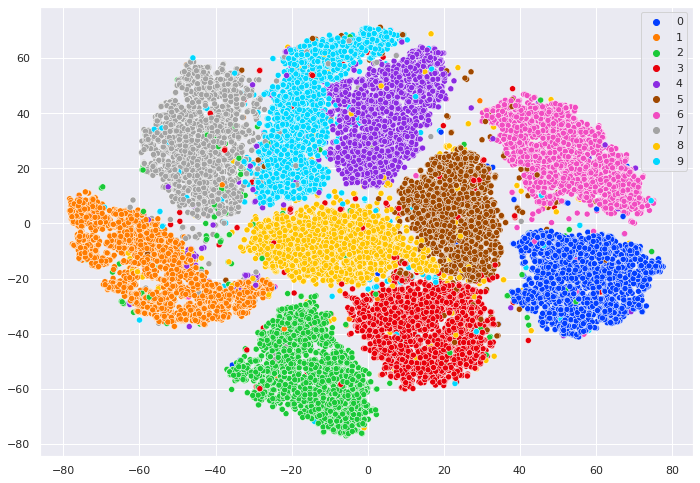

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
palette = sns.color_palette("bright", 10)
sns.scatterplot(embedding_train_2[:,0], embedding_train_2[:,1], hue=y_train, legend='full', palette=palette)

In [ ]:
%%time
embedding_test = embedding_train_2.prepare_partial(
    x_test,
    initialization="median",
    k=25,
    perplexity=5,
)

===> Finding 15 nearest neighbors in existing embedding using Annoy approximate search...
   --> Time elapsed: 12.62 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.18 seconds
CPU times: user 23.6 s, sys: 408 ms, total: 24 s
Wall time: 12.8 s


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


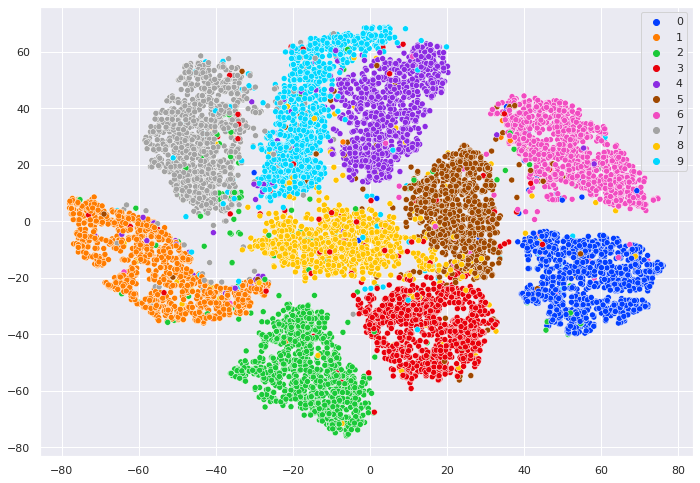

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
palette = sns.color_palette("bright", 10)
sns.scatterplot(embedding_test[:,0], embedding_test[:,1], hue=y_test, legend='full', palette=palette)

In [ ]:
%time embedding_test_1 = embedding_test.optimize(n_iter=250, learning_rate=0.1, momentum=0.8)

===> Running optimization with exaggeration=1.00, lr=0.10 for 250 iterations...
Iteration   50, KL divergence 179202.9446, 50 iterations in 0.4530 sec
Iteration  100, KL divergence 173636.3612, 50 iterations in 0.4706 sec
Iteration  150, KL divergence 171684.3054, 50 iterations in 0.4628 sec
Iteration  200, KL divergence 170722.3095, 50 iterations in 0.4933 sec
Iteration  250, KL divergence 170111.6270, 50 iterations in 0.4707 sec
   --> Time elapsed: 2.35 seconds
CPU times: user 3.57 s, sys: 67.2 ms, total: 3.64 s
Wall time: 3.05 s


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


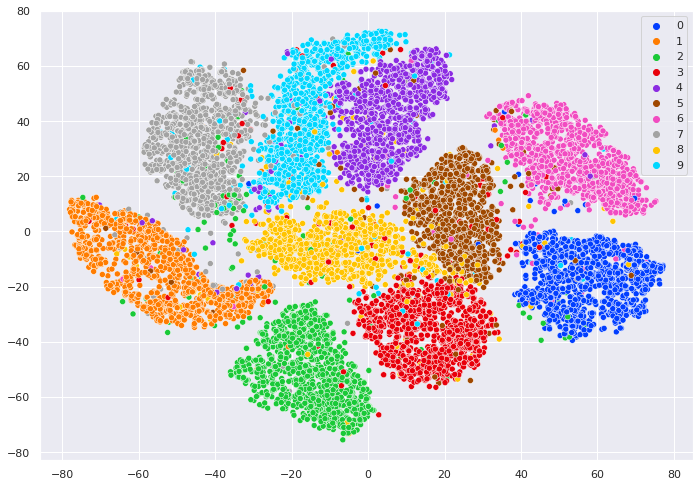

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
palette = sns.color_palette("bright", 10)
sns.scatterplot(embedding_test_1[:,0], embedding_test_1[:,1], hue=y_test, legend='full', palette=palette)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


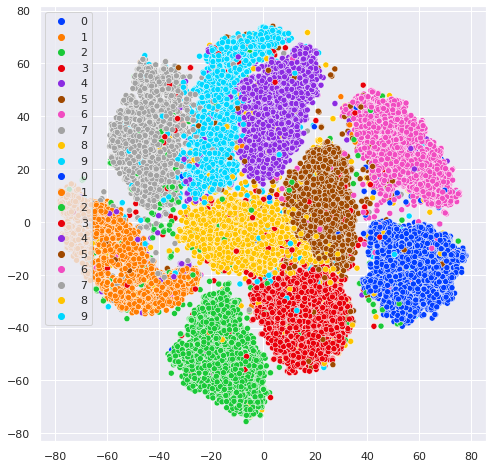

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.set(rc={'figure.figsize':(11.7,8.27)})
palette = sns.color_palette("bright", 10)
sns.scatterplot(embedding_train_2[:,0], embedding_train_2[:,1], hue=y_train, legend='full', palette=palette)
sns.set(rc={'figure.figsize':(11.7,8.27)})
palette = sns.color_palette("bright", 10)
sns.scatterplot(embedding_test_1[:,0], embedding_test_1[:,1], hue=y_test, legend='full', palette=palette)